In [1]:
import pandas as pd
import requests as rq
from bs4 import BeautifulSoup
import requests
from PIL import Image
from io import BytesIO


In [2]:
# Instantiate the connection from the website
url = 'https://www.pieces-euro.tv/'
r = rq.get(url)
print(r.status_code)

200


In [3]:
# Create the soup
soup = BeautifulSoup(r.text, 'html.parser')
# find specific 'id' from the soup
usermenu = soup.find(id='usermenu')
# find in a list all the href all the 'a' tags
links = usermenu.find_all('a')
# extract only the href
links = [link.get('href') for link in links]
# Create a new list with "\n" characters removed
links[0] = links[0][:-1]
print(links)


['https://www.pieces-euro.tv/allemagne/pieces-euro-berlin-2023', 'https://www.pieces-euro.tv/andorre/pieces-euro-2022', 'https://www.pieces-euro.tv/autriche/pieces-euro-2023', 'https://www.pieces-euro.tv/belgique/pieces-euro-2022', 'https://www.pieces-euro.tv/chypre/pieces-euro-2022\n', 'https://www.pieces-euro.tv/croatie/pieces-euro-2023', 'https://www.pieces-euro.tv/espagne/pieces-euro-2023', 'https://www.pieces-euro.tv/estonie/pieces-euro-2022\n', 'https://www.pieces-euro.tv/finlande/pieces-euro-2023', 'https://www.pieces-euro.tv/france/pieces-euro-2023\n', 'https://www.pieces-euro.tv/grece/pieces-euro-2022\n', 'https://www.pieces-euro.tv/irlande/pieces-euro-2022', 'https://www.pieces-euro.tv/italie/pieces-euro-2023', 'https://www.pieces-euro.tv/lettonie/pieces-euro-2022', 'https://www.pieces-euro.tv/lituanie/pieces-euro-2023\n', 'https://www.pieces-euro.tv/luxembourg/pieces-euro-2023', 'https://www.pieces-euro.tv/malte/pieces-euro-2022', 'https://www.pieces-euro.tv/monaco/pieces-eu

In [4]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup

def extract_menuyeartree_elements(url_list):
    driver = webdriver.Chrome()  # Replace with the path to your preferred web driver
    menuyeartree_elements = []

    for url in url_list:
        driver.get(url)
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        menuyeartree = soup.find_all('a', class_='menuyeartree')
        menuyeartree_elements.extend(menuyeartree)

    driver.quit()  # Close the web driver

    return menuyeartree_elements


In [5]:
menuyeartree_elements = extract_menuyeartree_elements(links)

# Print the extracted menuyeartree elements
for element in menuyeartree_elements:
    print(element.text)

WebDriverException: Message: unknown error: cannot find Chrome binary
Stacktrace:
#0 0x5573d0a624e3 <unknown>
#1 0x5573d0791c76 <unknown>
#2 0x5573d07b8757 <unknown>
#3 0x5573d07b7029 <unknown>
#4 0x5573d07f5ccc <unknown>
#5 0x5573d07f547f <unknown>
#6 0x5573d07ecde3 <unknown>
#7 0x5573d07c22dd <unknown>
#8 0x5573d07c334e <unknown>
#9 0x5573d0a223e4 <unknown>
#10 0x5573d0a263d7 <unknown>
#11 0x5573d0a30b20 <unknown>
#12 0x5573d0a27023 <unknown>
#13 0x5573d09f51aa <unknown>
#14 0x5573d0a4b6b8 <unknown>
#15 0x5573d0a4b847 <unknown>
#16 0x5573d0a5b243 <unknown>
#17 0x7f6734134609 start_thread


In [12]:

# Create the soup
soup = BeautifulSoup(r.text, 'html.parser')
# get specific 'id' from the soup
usermenu = soup.find(id='usermenu')

# get the href from the 'a' tag and iterate over the list
list = []
for a in usermenu.find_all('a', href=True):
    list.append(a['href'])
list[0] = list[0][:-1]

# click on the first link
click = rq.get(links[0])
print(r.status_code)



InvalidSchema: No connection adapters were found for '<a href="https://www.pieces-euro.tv/allemagne/pieces-euro-berlin-2023\n">- Allemagne</a>'

In [27]:
#Function to get every every link in the list
def open_link(list):
    for i in list:
        click = rq.get(i)
        print(click.status_code)
        soup = BeautifulSoup(click.text, 'html.parser')
        usermenu = soup.find(id='usermenu')
        list = []
        for a in usermenu.find_all('a', href=True):
            list.append(a['href'])
        # remove all caracters "\n" in the list.
        list = [item.replace('\n', '') for item in list]
        return list


open_link(links)

200


['https://www.pieces-euro.tv/allemagne/pieces-euro-berlin-2022',
 'https://www.pieces-euro.tv/allemagne/pieces-euro-berlin-2021',
 'https://www.pieces-euro.tv/allemagne/pieces-euro-berlin-2020',
 'https://www.pieces-euro.tv/allemagne/pieces-euro-berlin-2019',
 'https://www.pieces-euro.tv/allemagne/pieces-euro-berlin-2018',
 'https://www.pieces-euro.tv/allemagne/pieces-euro-berlin-2017',
 'https://www.pieces-euro.tv/allemagne/pieces-euro-berlin-2016',
 'https://www.pieces-euro.tv/allemagne/pieces-euro-berlin-2015',
 'https://www.pieces-euro.tv/allemagne/pieces-euro-berlin-2014',
 'https://www.pieces-euro.tv/allemagne/pieces-euro-berlin-2013',
 'https://www.pieces-euro.tv/allemagne/pieces-euro-berlin-2012',
 'https://www.pieces-euro.tv/allemagne/pieces-euro-berlin-2011',
 'https://www.pieces-euro.tv/allemagne/pieces-euro-berlin-2010',
 'https://www.pieces-euro.tv/allemagne/pieces-euro-berlin-2009',
 'https://www.pieces-euro.tv/allemagne/pieces-euro-berlin-2008',
 'https://www.pieces-euro

In [5]:
def iterate_links_and_click(url):
    # Create the soup
    soup = BeautifulSoup(url, 'html.parser')
    # Get specific 'id' from the soup
    usermenu = soup.find(id='usermenu')

    # Get the href from the 'a' tag and iterate over the list
    link_list = []
    for a in usermenu.find_all('a', href=True):
        link_list.append(a['href'])
    #link_list[0] = link_list[0][:-1]

    # Click on the first link
    click = rq.get(link_list[0])
    print(click.status_code)

    return click.text


In [6]:
iterate_links_and_click(url)

/tmp/ipykernel_3826/1002782433.py:3: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(url, 'html.parser')


AttributeError: 'NoneType' object has no attribute 'find_all'

In [7]:
# inspect the soup of the new page
soup = BeautifulSoup(click.text, 'html.parser')

# get class cat_itembox from the soup
cat_itembox = soup.find_all(class_='cat_itembox')

for element in cat_itembox:
    # Extract the desired information from each element
    preis = element.find('p', class_='cat_preis').text.strip()
    titel = element.find('p', class_='cat_titel').text.strip()
    tirage = element.find('div', class_='cat_info').text.strip()
    picture_div = element.find('div', class_='cat_preuser')
    picture_url = picture_div.find('img')['data-original']
    base = 'https://www.pieces-euro.tv/'
    picture_url = base + picture_url
    
    # Print the extracted information
    print("Price:", preis)
    print("Title:", titel)
    print("Tirage:", tirage)
    print("Picture:", picture_url)

Price: 2,25
Title: Allemagne 1 Cent 2023 A
Tirage: Tirage: 28.800.000
Picture: https://www.pieces-euro.tv//img02/thumb/Allemagne-1-Cent-2023-A-3390100-168265018226889.jpg
Price: 2,00
Title: Allemagne 2 Cent 2023 A
Tirage: Tirage: 18.000.000
Picture: https://www.pieces-euro.tv//img04/thumb/Allemagne-2-Cent-2023-A-3390150-168265018554688.jpg
Price: 1,67
Title: Allemagne 5 Cent 2023 A
Tirage: Tirage: 9.000.000
Picture: https://www.pieces-euro.tv//img02/thumb/Allemagne-5-Cent-2023-A-3390200-168265019061568.jpg
Price: 2,07
Title: Allemagne 10 Cent 2023 A
Tirage: Tirage: 18.400.000
Picture: https://www.pieces-euro.tv//img01/thumb/Allemagne-10-Cent-2023-A-3390250-168265019589452.jpg
Price: 2,25
Title: Allemagne 20 Cent 2023 A
Tirage: Tirage: 11.000.000
Picture: https://www.pieces-euro.tv//img05/thumb/Allemagne-20-Cent-2023-A-3390300-168265020266188.jpg
Price: 3,50
Title: Allemagne 50 Cent 2023 A
Tirage: Tirage: 12.000.000
Picture: https://www.pieces-euro.tv//img02/thumb/Allemagne-50-Cent-2023

In [8]:
def inspect_soup(click_text):
    # Inspect the soup of the new page
    soup = BeautifulSoup(click_text, 'html.parser')

    # Get class cat_itembox from the soup
    cat_itembox = soup.find_all(class_='cat_itembox')

    results = []
    for element in cat_itembox:
        # Extract the desired information from each element
        preis = element.find('p', class_='cat_preis').text.strip()
        titel = element.find('p', class_='cat_titel').text.strip()
        tirage = element.find('div', class_='cat_info').text.strip()
        picture_div = element.find('div', class_='cat_preuser')
        picture_url = picture_div.find('img')['data-original']
        base = 'https://www.pieces-euro.tv/'
        picture_url = base + picture_url

        # Store the information in a dictionary
        item_info = {
            'preis': preis,
            'titel': titel,
            'tirage': tirage,
            'picture_url': picture_url
        }

        results.append(item_info)

    return results


In [9]:
inspect_soup(click.text)

[{'preis': '2,25',
  'titel': 'Allemagne 1 Cent 2023 A',
  'tirage': 'Tirage: 28.800.000',
  'picture_url': 'https://www.pieces-euro.tv//img02/thumb/Allemagne-1-Cent-2023-A-3390100-168265018226889.jpg'},
 {'preis': '2,00',
  'titel': 'Allemagne 2 Cent 2023 A',
  'tirage': 'Tirage: 18.000.000',
  'picture_url': 'https://www.pieces-euro.tv//img04/thumb/Allemagne-2-Cent-2023-A-3390150-168265018554688.jpg'},
 {'preis': '1,67',
  'titel': 'Allemagne 5 Cent 2023 A',
  'tirage': 'Tirage: 9.000.000',
  'picture_url': 'https://www.pieces-euro.tv//img02/thumb/Allemagne-5-Cent-2023-A-3390200-168265019061568.jpg'},
 {'preis': '2,07',
  'titel': 'Allemagne 10 Cent 2023 A',
  'tirage': 'Tirage: 18.400.000',
  'picture_url': 'https://www.pieces-euro.tv//img01/thumb/Allemagne-10-Cent-2023-A-3390250-168265019589452.jpg'},
 {'preis': '2,25',
  'titel': 'Allemagne 20 Cent 2023 A',
  'tirage': 'Tirage: 11.000.000',
  'picture_url': 'https://www.pieces-euro.tv//img05/thumb/Allemagne-20-Cent-2023-A-3390300-

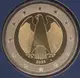

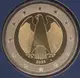

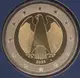

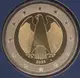

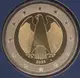

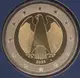

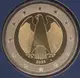

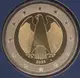

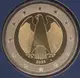

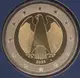

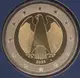

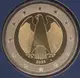

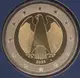

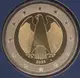

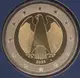

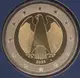

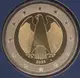

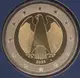

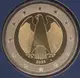

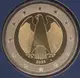

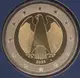

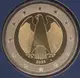

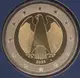

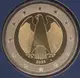

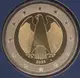

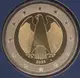

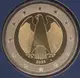

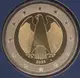

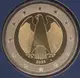

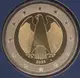

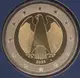

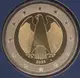

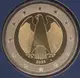

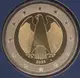

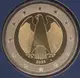

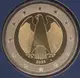

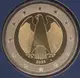

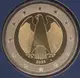

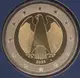

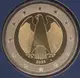

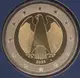

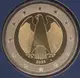

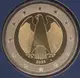

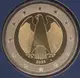

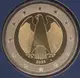

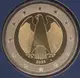

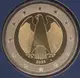

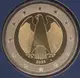

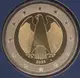

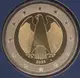

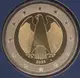

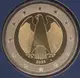

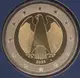

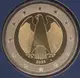

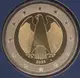

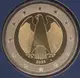

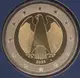

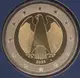

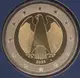

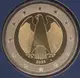

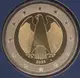

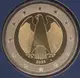

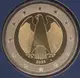

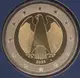

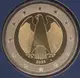

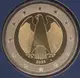

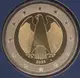

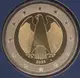

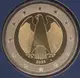

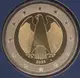

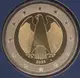

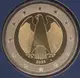

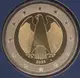

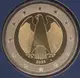

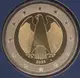

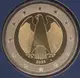

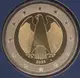

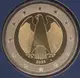

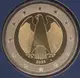

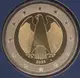

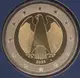

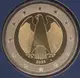

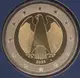

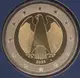

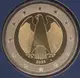

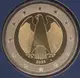

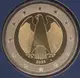

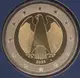

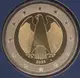

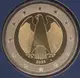

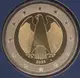

In [ ]:
# Send a GET request to download the image
response = requests.get(picture_url)

for element in picture_url:
    # Check if the request was successful
    if response.status_code == 200:
        # Create an Image object from the downloaded image
        image = Image.open(BytesIO(response.content))
        # Display the images
        image.show()
        # Save the image to the local file system with a unique filename taking reference from the url 
    else:
        print("Failed to download the image.")
